# Decision trees

**Imports**

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [47]:
import numpy as np
np.version.version

'1.24.3'

In [48]:
%matplotlib inline

In [49]:
import matplotlib.pyplot as plt

**Exercise 1**

- load `Hitters.csv` into a dataframe
- describe the dataframe, columns, dtypes
- display its head
- check for missing values
- fill missing values by median

In [50]:
# load Hitters.csv
df = pd.read_csv('./Hitters.csv')

In [51]:
# describe the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [52]:
# display its head
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [53]:
# check for missing values
df.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [54]:
# Fill missing values by median
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [55]:
# check for missing values
df['Salary'].isna().sum()

0

In [56]:
# another possibility
# df['Salary'].fillna(df['Salary'].median(), inplace=True)

**Exercise 2**

- define a simpler dataframe keeping `Salary` (dependent variable) and only two independant variables (such as `Years` and `Hits` for instance)
- describe the data frame, disply its head
- store your independant (x) and dependant variables (y), and split them into training and validation samples
- fit a decision tree regressor with default parameter on the training set, compute its scores (train and valid)
- fit decision tree regressors with varying values of `min_sample_leaf` and compute their train and valid scores
- fit decision tree regressors with varying values of `max_depth` and compute their train and valid scores
- print the training and validation scores of these models
- perform a grid search with sklearn to find the best decision tree model
- fit that model again on the whole data set, and compute its score
- draw the decision tree of that best tree model

In [57]:
# define a simpler dataframe keeping Salary (dependent variable) and only two independant variables
# (such as Years and Hits for instance)
df_simple = df[['Salary', 'Years', 'Hits']]

In [58]:
# describe the data frame, 
df_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  322 non-null    float64
 1   Years   322 non-null    int64  
 2   Hits    322 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 7.7 KB


In [59]:
df_simple.isna().sum()

Salary    0
Years     0
Hits      0
dtype: int64

In [60]:
# display its head
df_simple.head(5)

,Salary,Years,Hits
0,425.0,1,66
1,475.0,14,81
2,480.0,3,130
3,500.0,11,141
4,91.5,2,87


In [61]:
# store your independant (x) and dependant variables (y), 
X = df_simple[['Years', 'Hits']]
y = df_simple['Salary']

In [62]:
X.shape, y.shape

((322, 2), (322,))

In [63]:
# and split them from training and testing
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [64]:
# fit a decision tree regressor with default parameter on the training set, 
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [65]:
# compute its scores (train and valid) R squre
from sklearn.model_selection import cross_val_score

print(f"score for the training set : {dt.score(X_train, y_train) : .3f}")
# scores = cross_val_score(dt, X, y, scoring="neg_mean_squared_error", cv=10)
print(f"score for the training set : {dt.score(X_valid, y_valid) : .3f}")

score for the training set :  0.991
score for the training set : -0.219


In [66]:
# fit decision tree regressors with varying values of min_sample_leaf
# and compute their train and valid scores
min_sample_leaves = range(1,31)

train_scores = []
valid_scores = []

for min_samples in min_sample_leaves:
    model_tr = DecisionTreeRegressor(min_samples_leaf=min_samples, random_state=42)
    model_tr.fit(X_train, y_train)
    
    # Compute train and valid scores
    train_score = model_tr.score(X_train, y_train)
    valid_score = model_tr.score(X_valid, y_valid)
    
    # Append scores to lists
    train_scores.append(train_score)
    valid_scores.append(valid_score)

# Print out the results
for min_samples, train_score, valid_score in zip(min_sample_leaves, train_scores, valid_scores):
    print(f"min_samples_leaf = {min_samples}:")
    print(f"Training Score: {train_score:.4f}")
    print(f"Validation Score: {valid_score:.4f}")
    print("------------------------------")

min_samples_leaf = 1:
Training Score: 0.9915
Validation Score: -0.2195
------------------------------
min_samples_leaf = 2:
Training Score: 0.7505
Validation Score: 0.0765
------------------------------
min_samples_leaf = 3:
Training Score: 0.6307
Validation Score: 0.2356
------------------------------
min_samples_leaf = 4:
Training Score: 0.5867
Validation Score: 0.2741
------------------------------
min_samples_leaf = 5:
Training Score: 0.5619
Validation Score: 0.3038
------------------------------
min_samples_leaf = 6:
Training Score: 0.5464
Validation Score: 0.2835
------------------------------
min_samples_leaf = 7:
Training Score: 0.5220
Validation Score: 0.3303
------------------------------
min_samples_leaf = 8:
Training Score: 0.4875
Validation Score: 0.3123
------------------------------
min_samples_leaf = 9:
Training Score: 0.4756
Validation Score: 0.3202
------------------------------
min_samples_leaf = 10:
Training Score: 0.4697
Validation Score: 0.3328
-------------------

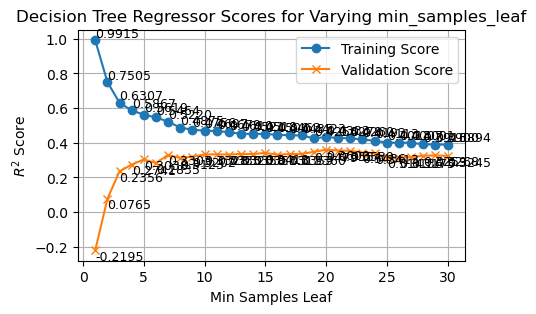

In [67]:
import matplotlib.pyplot as plt

# Using the same min_samples_leaf_values, train_scores, and valid_scores from the previous code:

plt.figure(figsize=(5, 3))
plt.plot(min_sample_leaves, train_scores, marker='o', label='Training Score')
plt.plot(min_sample_leaves, valid_scores, marker='x', label='Validation Score')

# Annotate each point with its respective score for clarity
for i, (train, valid) in enumerate(zip(train_scores, valid_scores)):
    plt.annotate(f"{train:.4f}", (min_sample_leaves[i], train), fontsize=9, verticalalignment='bottom')
    plt.annotate(f"{valid:.4f}", (min_sample_leaves[i], valid), fontsize=9, verticalalignment='top')

plt.xlabel('Min Samples Leaf')
plt.ylabel('$R^2$ Score')
plt.title('Decision Tree Regressor Scores for Varying min_samples_leaf')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# plot the training and validation scores of these models
## Your codes here ##

In [69]:
# fit decision tree regressors with varying values of max_depth
# and compute their train and valid scores
# fit decision tree regressors with varying values of min_sample_leaf
# and compute their train and valid scores
max_depth_leaves = range(1,31)

train_scores = []
valid_scores = []

for max_samples in max_depth_leaves:
    model_tr = DecisionTreeRegressor(max_depth=max_samples, random_state=42)
    model_tr.fit(X_train, y_train)
    
    # Compute train and valid scores
    train_score = model_tr.score(X_train, y_train)
    valid_score = model_tr.score(X_valid, y_valid)
    
    # Append scores to lists
    train_scores.append(train_score)
    valid_scores.append(valid_score)

# Print out the results
for max_samples, train_score, valid_score in zip(max_depth_leaves, train_scores, valid_scores):
    print(f"min_samples_leaf = {max_samples}:")
    print(f"Training Score: {train_score:.4f}")
    print(f"Validation Score: {valid_score:.4f}")
    print("------------------------------")

min_samples_leaf = 1:
Training Score: 0.2027
Validation Score: 0.0545
------------------------------
min_samples_leaf = 2:
Training Score: 0.4346
Validation Score: 0.0174
------------------------------
min_samples_leaf = 3:
Training Score: 0.4993
Validation Score: 0.0933
------------------------------
min_samples_leaf = 4:
Training Score: 0.5858
Validation Score: 0.1810
------------------------------
min_samples_leaf = 5:
Training Score: 0.6617
Validation Score: 0.1828
------------------------------
min_samples_leaf = 6:
Training Score: 0.7225
Validation Score: 0.0998
------------------------------
min_samples_leaf = 7:
Training Score: 0.8286
Validation Score: -0.1398
------------------------------
min_samples_leaf = 8:
Training Score: 0.8967
Validation Score: -0.2769
------------------------------
min_samples_leaf = 9:
Training Score: 0.9334
Validation Score: -0.1905
------------------------------
min_samples_leaf = 10:
Training Score: 0.9505
Validation Score: -0.1964
----------------

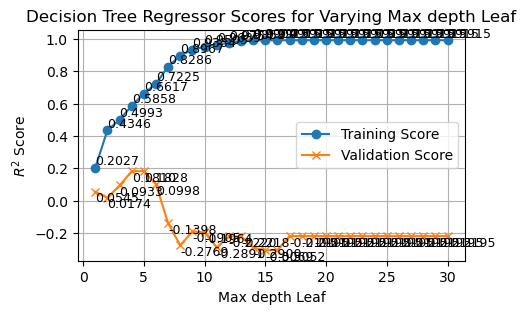

In [70]:
plt.figure(figsize=(5, 3))
plt.plot(max_depth_leaves, train_scores, marker='o', label='Training Score')
plt.plot(max_depth_leaves, valid_scores, marker='x', label='Validation Score')

# Annotate each point with its respective score for clarity
for i, (train, valid) in enumerate(zip(train_scores, valid_scores)):
    plt.annotate(f"{train:.4f}", (max_depth_leaves[i], train), fontsize=9, verticalalignment='bottom')
    plt.annotate(f"{valid:.4f}", (max_depth_leaves[i], valid), fontsize=9, verticalalignment='top')

plt.xlabel('Max depth Leaf')
plt.ylabel('$R^2$ Score')
plt.title('Decision Tree Regressor Scores for Varying Max depth Leaf')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# # plot the training and validation scores of these models
## Your codes here ##

In [81]:
# perform a grid search with sklearn to find the best decision tree model

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# cart_grid = {"min_samples_split": range(1, 10), "min_samples_leaf": range(1, 60)}

grid = GridSearchCV(estimator = dt, param_grid={'min_sample_leaves':range(1,31), 
                                         'max_depth':range(1,21)}, n_jobs=-1, cv = 5)

In [82]:
38*18

684

In [85]:
param_grid = {
    'min_samples_leaf': range(1,31), 
    'max_depth': range(1,21)
}

grid = GridSearchCV(estimator=dt, param_grid=param_grid, n_jobs=-1, cv=5, refit=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 21),
                         'min_samples_leaf': range(1, 31)})

In [86]:
# the best estimator found by gridsearch
best_tree = grid.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=2, min_samples_leaf=22, random_state=42)

In [87]:
# the score of the best model
best_score = grid.best_score_
best_score

0.28141097233279977

In [41]:
# check
## Your codes here ##

0.6442360431557344

### Warning !

**What if there is a serious (conceptual) flaw in our approach ?**

In [42]:
# perform a grid search with sklearn to find the best decision tree model

## Your codes here ##

Fitting 3 folds for each of 684 candidates, totalling 2052 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=1)

In [43]:
# the best estimator found by gridsearch
## Your codes here ##

DecisionTreeRegressor(max_depth=4, min_samples_leaf=9)

In [44]:
# the score of the best model
## Your codes here ##

0.5032144620121384

In [88]:
from sklearn.tree import export_graphviz

export_graphviz( 
 best_tree,
 out_file=("hitters_simple.dot"),
 feature_names=X_train.columns,
 class_names=None,
 filled=True,
)

In [89]:
!dot -Tpng hitters_simple.dot -o hitters_simple.png

zsh:1: command not found: dot


In [92]:
from IPython.display import Image
Image("./hitters_simple.png")

FileNotFoundError: No such file or directory: './hitters_simple.png'

FileNotFoundError: No such file or directory: './hitters_simple.png'

<IPython.core.display.Image object>

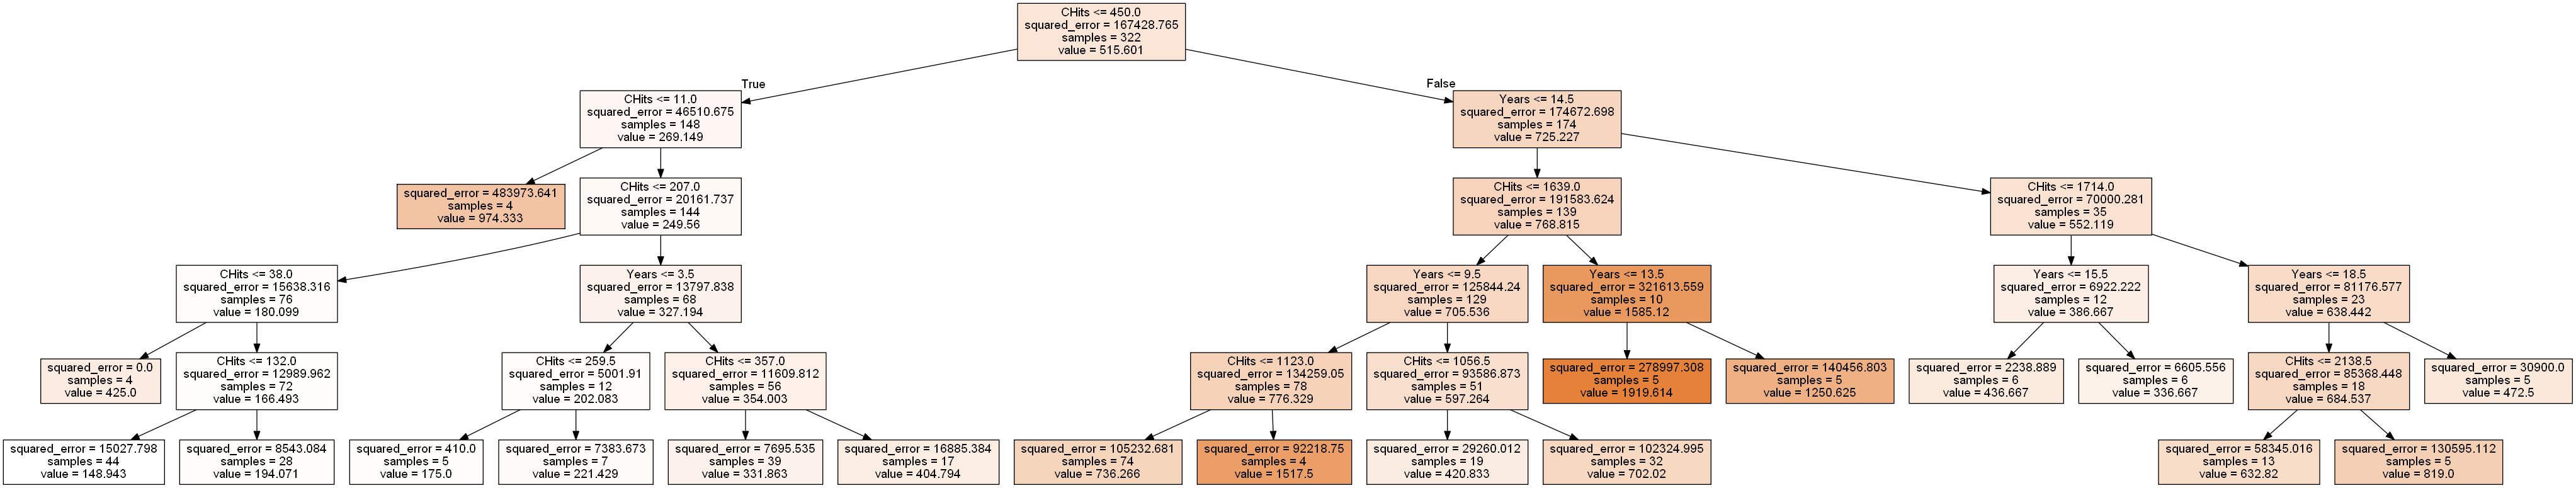

In [53]:
from IPython.display import Image
Image("hitters_simple.png")

**Exercise 3**

We now work with all dependent variables.

- display the full dataframe dtypes again, and look at the columns with non numeric values
- drop these columns, and perform the same analysis as in Exercise 2 to find a good tree model
- retrain this model on the full data set and compute its score

In [ ]:
# display the full dataframe again
## Your codes here ##

In [ ]:
# look at the columns with non numeric values
## Your codes here ##

In [ ]:
# drop these columns
to_drop = ## Your codes here ##
df = df_raw.drop(columns=to_drop)

In [ ]:
# Use "Salary" as outcome
x, y = ## Your codes here ##

In [ ]:
# Use a gridsearch process to tune some hyperparameters - be careful of overfitting !
## Your codes here ##

In [ ]:
# Provide the scores of the best model - be carefull of overfitting !
## Your codes here ##

In [ ]:
# Explore the models 10 most important variables (feature importance)
## Your codes here ##

**Exercise 4**

- categorify the non numerical columns, then numericalize them
- redo the previous analysis

In [ ]:
df_full = df_raw.copy() 

In [ ]:
# determine the non quantitative variables, then find a way to recode them into numerical variables
# hint - you choose aming the following : one hot enconding, dummy coding, numericalizing
## Your codes here ##

In [ ]:
for col in to_drop:
    print(df_full[col].value_counts())

In [ ]:
# Use "Salary" as outcome
x, y = ## Your codes here ##

In [ ]:
# Use a gridsearch process to tune some hyperparameters - be careful of overfitting !
## Your codes here ##

In [ ]:
# Provide the scores of the best model - be carefull of overfitting !
## Your codes here ##

**Conclusion**
- Has anything changed ?
- Has your model improved ?
- What about the feature importance ?

**Exercise 5 (OPTIONAL)**

- fit a default random forest regressor and compute its score
- display the feature importances
- perform a grid search, with varying values of `n_estimators`, `max_depth`, `min_sample_leaf`, and `max_features`, to find a good model
- compare the performance of your best Random Forest with your Best Decision Trees